# Heart Diseases Prediction - ML Project
#### **Roll No.**

*CS21092*

*CS21083*

*CS21077*

## About the dataset


https://archive.ics.uci.edu/dataset/45/heart+disease

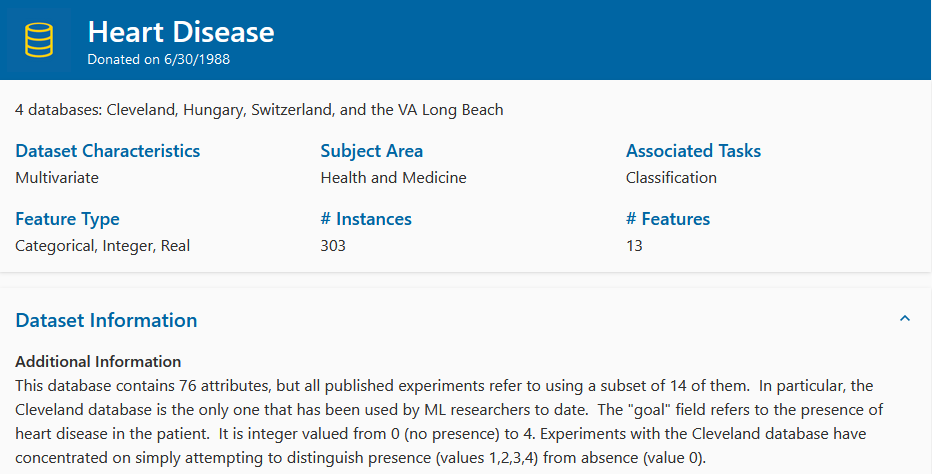


In [11]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Get the data

In [12]:
pip install ucimlrepo

In [13]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

"""
From the repository

The "goal" field refers to the presence of heart disease in the patient.
It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland
database have concentrated on simply attempting to distinguish
presence (values 1,2,3,4) from absence (value 0).
"""

print("Y \n", y.head())

# making y binary where 0 means absence and 1 means presence
y_processed = pd.DataFrame(np.where(y == 0, 0, 1), columns=['num'])
print("Processed Y",y_processed.head())




Y 
    num
0    0
1    2
2    1
3    0
4    0
Processed Y    num
0    0
1    1
2    1
3    0
4    0


In [14]:
df = pd.concat([X, y_processed], axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## Dataset description - **Taken from the metadata**
     
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __age__ | Age of the patient in years |
| __sex__ | Gender of the patient (0 = male, 1 = female) |
| __cp__ | Chest pain type: <br> 1: Typical angina <br> 2: Atypical angina <br> 3: Non-anginal pain <br> 4: Asymptomatic |
| __trestbps__ | Resting blood pressure in mm Hg |
| __chol__ | Serum cholesterol in mg/dl |                     
| __fbs__ | Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false) |
| __restecg__ | Resting electrocardiographic results: <br> 0: Normal <br> 1: Having ST-T wave abnormality <br> 2: Showing probable or definite left ventricular hypertrophy |  
| __thalach__ | Maximum heart rate achieved during a stress test |                      
| __exang__ | Exercise-induced angina (1 = yes, 0 = no) |
| __oldpeak__ | ST depression induced by exercise relative to rest |
| __slope__ | Slope of the peak exercise ST segment: <br> 1: Upsloping <br> 2: Flat <br> 3: Downsloping |                      
| __ca__ | Number of major vessels (0-3) colored by fluoroscopy |              
| __thal__ | Thalium stress test result: <br> 3: Normal <br> 6: Fixed defect <br> 7: Reversible defect  |
| __target__ | Heart disease status (0 = no disease, 1 = presence of disease) |

## Feature Engineering
*Step 1* - **Exploratory Data Analysis**

*Step 2* - **Handle Outliers**

*Step 3* - **Handle Missing Values**

*Step 4* - **Scaling and Normalization of Data**

### Exploratory Data Analysis
***Steps to perform***

* *Univariate analysis*
* *Bivariate analysis*
* *Visualize missing values*
* *Identify outliers*

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


There **303 records** in the dataset and **13 features** making shape of the dataset **(303,13)**.  

Missing values in **ca** = 4

Missing values in **thal** = 2

In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


**No categorical features**. However, some features although are numbers but have categorical nature. These features include sex, fbs, restecg, thal, slope, cp, exang and target

In [17]:
numeric_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_feat = ['sex', 'restecg', 'thal', 'slope', 'cp', 'exang', 'num', 'ca','fbs']

#### Univariant Analysis

##### Categorical features

categorical_feat = ['sex', 'restecg', 'thal', 'slope', 'cp', 'exang', 'num','ca']

In [18]:
def plot_count(dataframe:pd.DataFrame,feat:str,x_label:str,x_ticks:list[str]=None):
  if x_ticks:
    ax = sns.countplot(x=feat, data=dataframe,palette='colorblind')
    ax.set_xticklabels(x_ticks)
  else:
    ax = sns.countplot(x=feat, data=dataframe,palette='colorblind')

  ax.set_xlabel(x_label)
  return ax


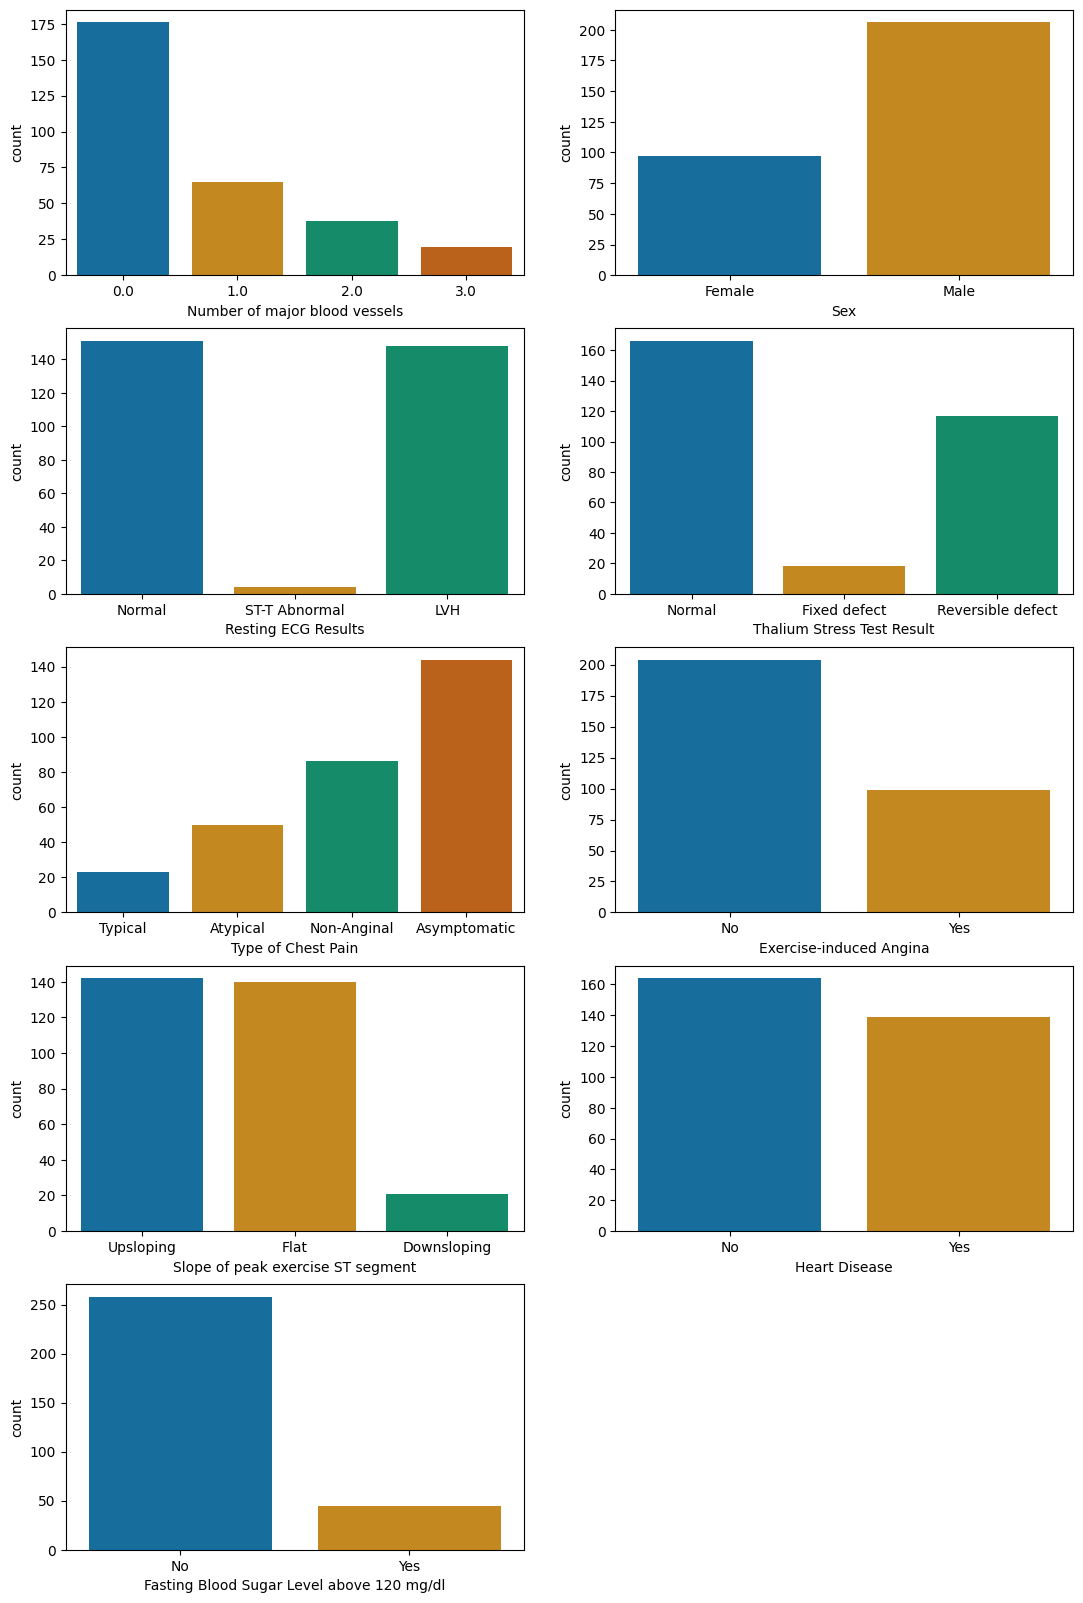

In [19]:
plt.figure(figsize=(13,20))
plt.subplot(5,2,1)
plot_count(df,feat='ca',x_label='Number of major blood vessels')
plt.subplot(5,2,2)
plot_count(df,feat='sex',x_label='Sex', x_ticks=['Female', 'Male'])
plt.subplot(5,2,3)
plot_count(df,feat='restecg',x_label="Resting ECG Results", x_ticks=['Normal', 'ST-T Abnormal','LVH'])
plt.subplot(5,2,4)
plot_count(df,feat='thal',x_label="Thalium Stress Test Result", x_ticks=['Normal','Fixed defect','Reversible defect'])
plt.subplot(5,2,5)
plot_count(df,feat='cp',x_label="Type of Chest Pain", x_ticks=['Typical', 'Atypical','Non-Anginal','Asymptomatic'])
plt.subplot(5,2,6)
plot_count(df,feat='exang',x_label="Exercise-induced Angina", x_ticks=['No', 'Yes'])
plt.subplot(5,2,7)
plot_count(df,feat='slope',x_label="Slope of peak exercise ST segment", x_ticks=['Upsloping','Flat','Downsloping'])
plt.subplot(5,2,8)
plot_count(df,feat='num',x_label="Heart Disease", x_ticks=['No', 'Yes'])
plt.subplot(5,2,9)
plot_count(df,feat='fbs',x_label="Fasting Blood Sugar Level above 120 mg/dl", x_ticks=['No', 'Yes'])

plt.show()

###### **Inference**

* Target variable appears to be **balanced** with approximately **160** *negatives* and **140** *positive* cases
* Male patients are almost twice more than female patients so this dataset may be **male bias**
* Most patients report **asymptomatic** chest pain
* Most patients have **normal** thalium stress level
* Majority patients **did not** report any exercise-related chest pain
* Majority patients **do not** have high blood sugar
* Majority patients during Thalium stress test showed **no major signs** of any heart disease
* Approximately half the patients showed **normal** heart beat during resting ECG and the other half show signs of **left ventricular hypertrophy**



##### Numeric features
numeric_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [20]:
def plot_histogram(dataframe:pd.DataFrame,feat:str,x_label:str):
  ax = sns.histplot(x=feat, kde=True, data=dataframe,color="purple")
  ax.set_xlabel(x_label)
  return ax


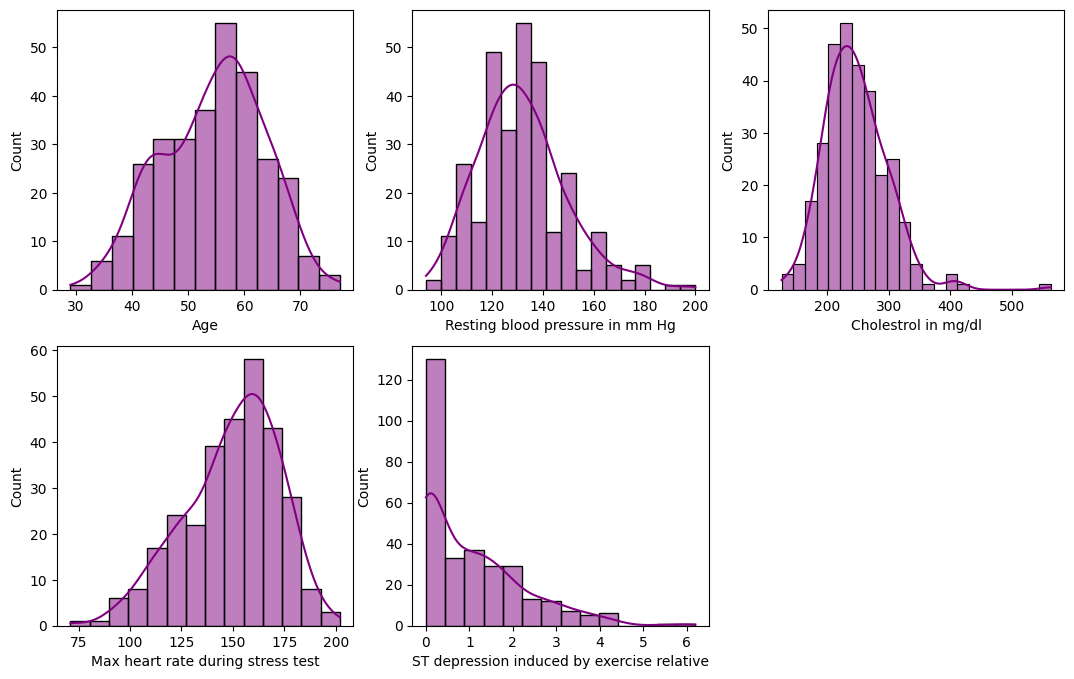

In [21]:
plt.figure(figsize=(13,8))
plt.subplot(2,3,1)
plot_histogram(df,"age","Age")
plt.subplot(2,3,2)
plot_histogram(df,"trestbps","Resting blood pressure in mm Hg")
plt.subplot(2,3,3)
plot_histogram(df,"chol","Cholestrol in mg/dl")
plt.subplot(2,3,4)
plot_histogram(df,"thalach","Max heart rate during stress test")
plt.subplot(2,3,5)
plot_histogram(df,"oldpeak","ST depression induced by exercise relative")

plt.show()

###### **Inference**

* **Age** is approximately *normally* distributed

* **trestbsps**,**chol** is *right* skewed

* **thalach** is *left* skewed

* **oldpeak** is not normal